## Kevin Cookie Analysis 

## Overview of dataset

Kevin Cookie Company is one of the most popular cookie company in world. In our dataset we'll be analysising companies financial aspect on basis of five countries it is currently operating in namely United States, United Kingdom , India ,Malaysia and Philippines. The dataset also contains the basic financial analysis information which include units sold , Revenue , Cost, Profit. It data also ontains the information about the product category it sold. 
As, it is importat for every company to analysis it's financial position in terms of units it sold , revenue generation and accordingly investing in the specifc product and region.Thus, we'll be analysing the dataset on the same parameters 


## Objectives 

1. To find the country generating the most revenue and profit 

2. To find most revenue generating product 

3. To find the no. of units sold in eah product cataegory 

4. To find which product is most demanding and profitable in which country 

5. To find on which date the most revenue is generated 

6. To find the percent of each product category in total number of units sold 

7. To find the percent of each product category in total profit generation

8. To check whether the data is normally distributed 

9. To find the per unit price of product in each category 

10. To check whether the product wise and country wise revenue data has mean and median statisti equally distributed on not by using ANOVA And Kruskal-Wallis Test


## Briefs on the Analysis

Financial analysis of information given in dataset will help in evaluating performance of Kevin Cookies Company. This information will help company in investing and disinvesting wisely in product category, distrubtion channels in different countries,positioning of specific product in specific country and cost controlling. The analysis will also help the company 
in future to make decisions of expanision in different geography and product line of related and unrelated products as per consumer response. 

In [37]:
#install specific version of libraries used in  lab
#! mamba install pandas==1.3.3  -y
#! mamba install numpy=1.21.2 -y

In [38]:
# Install PyDataset
!pip install pydataset


In [39]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [40]:
# importing required library
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
import streamlit as st
from PIL import Image
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.io as pio
from pydataset import data
import pandas as pd, numpy as np 
import scipy.stats as sps 
import statsmodels.api as sm, statsmodels.formula.api as smf 
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


In [82]:
#importing dataset
df = pd.read_csv('https://raw.githubusercontent.com/ram30098singh/Excel-Dashboard-/main/Kevin%20Cookie.csv')
df

,Country,Product,Units Sold,Revenue,Cost,Profit,Date
0,India,Chocolate Chip,1725,8625,3450,5175,11/1/2019
1,India,Chocolate Chip,2152,10760,4304,6456,12/1/2019
2,India,Chocolate Chip,2349,11745,4698,7047,9/1/2019
3,India,Chocolate Chip,1228,6140,2456,3684,10/1/2019
4,India,Chocolate Chip,1389,6945,2778,4167,10/1/2019
...,...,...,...,...,...,...,...
695,United States,White Chocolate Macadamia Nut,1596,9576,4389,5187,9/1/2020
696,United States,White Chocolate Macadamia Nut,986,5916,2712,3205,10/1/2020
697,United States,White Chocolate Macadamia Nut,606,3636,1667,1970,4/1/2020
698,United States,White Chocolate Macadamia Nut,2460,14760,6765,7995,7/1/2020


In [42]:
#fidning the shape of dataset
df.shape

(700, 7)

In [43]:
#to count the no. of null cells in each column
df.isnull().sum()

Country       0
Product       0
Units Sold    0
Revenue       0
Cost          0
Profit        0
Date          0
dtype: int64

## 1. Data Analysis : Descriptive Statistics

In [44]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     700 non-null    object
 1   Product     700 non-null    object
 2   Units Sold  700 non-null    int64 
 3   Revenue     700 non-null    int64 
 4   Cost        700 non-null    int64 
 5   Profit      700 non-null    int64 
 6   Date        700 non-null    object
dtypes: int64(4), object(3)
memory usage: 38.4+ KB


In [45]:
df.describe()  

,Units Sold,Revenue,Cost,Profit
count,700.000000,700.000000,700.000000,700.000000
mean,1608.320000,6700.455714,2752.868571,3947.734286
std,867.449766,4623.900732,2037.016446,2615.818560
min,200.000000,200.000000,40.000000,160.000000
25%,905.000000,2854.000000,1113.750000,1848.250000
50%,1542.500000,5871.500000,2423.500000,3424.500000
75%,2229.500000,9580.000000,3926.000000,5566.750000
max,4493.000000,23988.000000,10995.000000,13479.000000


In [46]:
df.describe(include=['object'])

,Country,Product,Date
count,700,700,700
unique,5,6,16
top,India,Chocolate Chip,10/1/2019
freq,140,202,70


In [47]:
df.describe(include="all")

,Country,Product,Units Sold,Revenue,Cost,Profit,Date
count,700,700,700.000000,700.000000,700.000000,700.000000,700
unique,5,6,NaN,NaN,NaN,NaN,16
top,India,Chocolate Chip,NaN,NaN,NaN,NaN,10/1/2019
freq,140,202,NaN,NaN,NaN,NaN,70
mean,NaN,NaN,1608.320000,6700.455714,2752.868571,3947.734286,NaN
std,NaN,NaN,867.449766,4623.900732,2037.016446,2615.818560,NaN
min,NaN,NaN,200.000000,200.000000,40.000000,160.000000,NaN
25%,NaN,NaN,905.000000,2854.000000,1113.750000,1848.250000,NaN
50%,NaN,NaN,1542.500000,5871.500000,2423.500000,3424.500000,NaN
75%,NaN,NaN,2229.500000,9580.000000,3926.000000,5566.750000,NaN


<AxesSubplot:xlabel='Product', ylabel='Units Sold'>

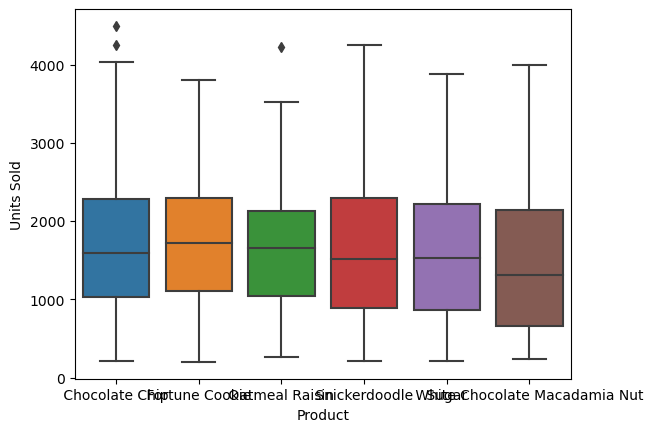

In [48]:
# relationship between "Units Sold" and "Product"

import seaborn as sns
sns.boxplot(x="Product", y="Units Sold", data=df )

<AxesSubplot:xlabel='Country', ylabel='Units Sold'>

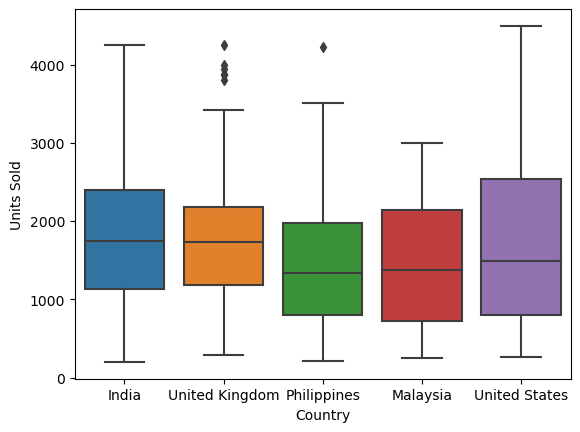

In [49]:
# relationship between "Units Sold" and "Country"

import seaborn as sns
sns.boxplot(x="Country", y="Units Sold", data=df)

<AxesSubplot:xlabel='Country', ylabel='Revenue'>

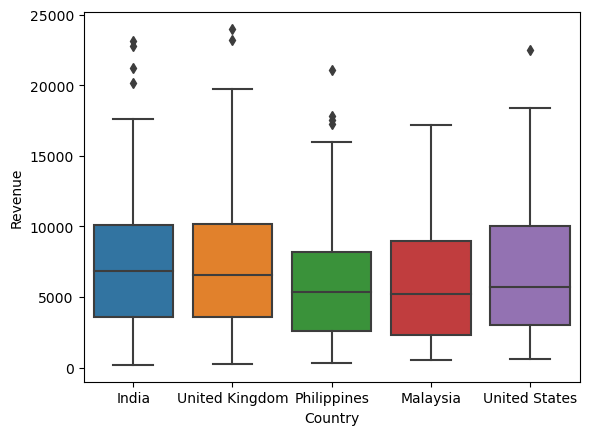

In [50]:
# relationship between "Revenue" and "Country"

import seaborn as sns
sns.boxplot(x="Country", y="Revenue", data=df)

Text(0.5, 1.0, 'Price distribution')

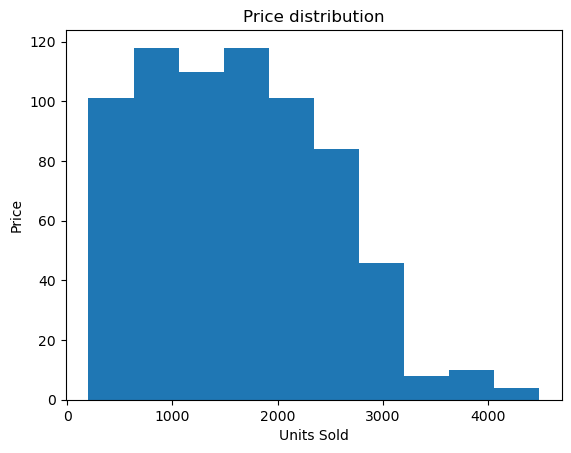

In [51]:
plt.pyplot.hist(df["Units Sold"])

# set x/y labels and plot title
plt.pyplot.xlabel("Units Sold")
plt.pyplot.ylabel("No. of Times")
plt.pyplot.title("Price distribution")

Text(0.5, 1.0, 'Profit distribution')

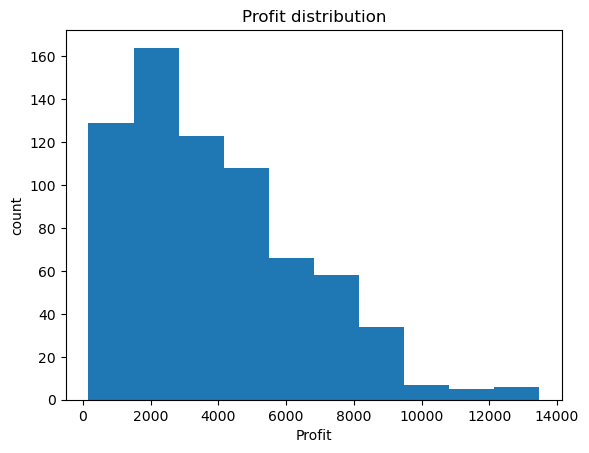

In [52]:
#to find the frequency of profit distribution using histrogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Profit"])

# set x/y labels and plot title
plt.pyplot.xlabel("Profit")
plt.pyplot.ylabel("count")
plt.pyplot.title("Profit distribution")

In [53]:
#finding country and product specific revenue 
df_group_one = df[['Country','Product','Revenue']]
df_group_one

,Country,Product,Revenue
0,India,Chocolate Chip,8625
1,India,Chocolate Chip,10760
2,India,Chocolate Chip,11745
3,India,Chocolate Chip,6140
4,India,Chocolate Chip,6945
...,...,...,...
695,United States,White Chocolate Macadamia Nut,9576
696,United States,White Chocolate Macadamia Nut,5916
697,United States,White Chocolate Macadamia Nut,3636
698,United States,White Chocolate Macadamia Nut,14760


In [54]:
df_group_one = df_group_one.groupby(['Country'],as_index=False).mean()
df_group_one

,Country,Revenue
0,India,7331.250000
1,Malaysia,5976.192857
2,Philippines,5993.392857
3,United Kingdom,7218.242857
4,United States,6983.200000


#
From our df_group_one, it seems that:
1. Revenue generated from India on an average is highest = 7331.25
2. Revenue generated from Malaysia on an average is lowest = 5976.19

In [113]:
# grouping results
df_gptest = df[['Country','Product','Revenue','Units Sold']]
grouped_test1 = df_gptest.groupby(['Country','Product'],as_index=False).mean()
grouped_test1

,Country,Product,Revenue,Units Sold
0,India,Chocolate Chip,9308.571429,1861.714286
1,India,Fortune Cookie,1749.444444,1749.444444
2,India,Oatmeal Raisin,8120.277778,1624.055556
3,India,Snickerdoodle,6961.000000,1740.250000
4,India,Sugar,5625.000000,1875.000000
5,India,White Chocolate Macadamia Nut,9739.500000,1623.250000
6,Malaysia,Chocolate Chip,7910.250000,1582.050000
7,Malaysia,Fortune Cookie,1587.700000,1587.700000
8,Malaysia,Oatmeal Raisin,7099.000000,1419.800000
9,Malaysia,Snickerdoodle,6049.777778,1512.444444


In [56]:
grouped_pivot = grouped_test1.pivot(index='Country',columns='Product')
grouped_pivot

Revenue                                    \
Product         Chocolate Chip   Fortune Cookie   Oatmeal Raisin    
Country                                                             
India               9308.571429      1749.444444      8120.277778   
Malaysia            7910.250000      1587.700000      7099.000000   
Philippines         6961.750000      1558.944444      8504.166667   
United Kingdom      8950.875000      1564.150000      8778.888889   
United States       8683.500000      1859.588235      8867.500000   

                                                                             
Product         Snickerdoodle        Sugar   White Chocolate Macadamia Nut   
Country                                                                      
India              6961.000000  5625.000000                     9739.500000  
Malaysia           6049.777778  3919.350000                     7238.181818  
Philippines        4988.800000  4245.136364                     8468.181818  
United Kingdom     7568.222222  4878.545455                     9984.545455  
United States      6075.058824  4500.130435                     9328.956522

## Heat map to visualize the relationship between Country and Product vs. Revenue

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline 

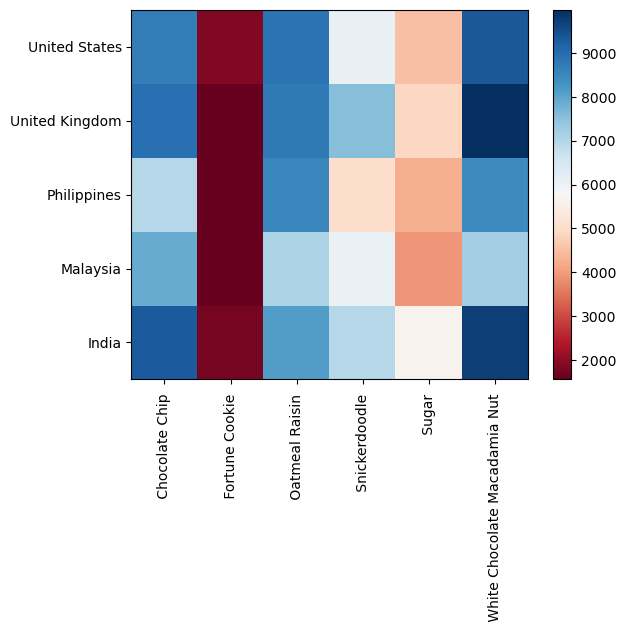

In [58]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [59]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country'],
    z = df['Units Sold'],
    locationmode = 'country names', 
    colorscale = 'jet',
    colorbar_title = "Units Sold",
))

fig.update_layout(
    title = dict(text = '<b>Countries Population Growth Rate</b>',
    x = 0.5)
)

fig.show()

## This world map shows:
India is the top country by profit generation among 
Malaysia,	
Philippines,	
United Kingdom,	
United States

In [60]:
cont_Units_Sold = df.groupby('Product',)[['Units Sold']].sum().sort_values(by = 'Units Sold', ascending = False)
cont_Units_Sold

,Units Sold
Product,
Chocolate Chip,338243
Sugar,168787
White Chocolate Macadamia Nut,162426
Oatmeal Raisin,155318
Fortune Cookie,154201
Snickerdoodle,146849


In [61]:
import plotly.offline as pyo
import plotly.graph_objs as go

fig = go.Figure(data = go.Pie(labels = cont_Units_Sold.index, values = cont_Units_Sold['Units Sold'].values))
fig.update_traces(hoverinfo='label',
                  hole = 0.4,
                  textfont_size = 18,
                  textposition ='auto',
                  marker=dict(colors = ['red', 'green', 'blue']
,
                              line = dict(color = 'white',
                                          width = 2)))
fig.update_layout(title ={'text' : '<b>Percent of product category in unit sold</b>', 
                          'x' : 0.21},
                          template = 'xgridoff',
                          width = 900, height = 600,
                     legend=dict(
                        title_font_family="Times New Roman",
                        font=dict(
                        family="Courier",
                        size=20,
                        color="black" 
                        ),
                        bgcolor="white",
                        bordercolor="Black",
                        borderwidth=2.5)
                 )
iplot(fig)

In [62]:
cont_Revenue = df.groupby('Country',)[['Revenue']].sum().sort_values(by = 'Revenue', ascending = False)
cont_Revenue

,Revenue
Country,
India,1026375
United Kingdom,1010554
United States,977648
Philippines,839075
Malaysia,836667


In [63]:
data = go.Bar(x = cont_Revenue.index, y = cont_Revenue['Revenue'], text = cont_Revenue['Revenue'],textposition ='outside',
              textfont = dict(size = 12,
                             color = 'green'),
              marker = dict(
                            opacity = 0.7,
                            line_color = 'red',
                            line_width = 2))
layout = go.Layout(title = {'text': "<b>Country Wise Revenue</b>",
                           'x':0.5,
                           'xanchor': 'center'},
                   xaxis = dict(title='<b>Country</b>'),
                   yaxis =dict(title='<b>Revenue</b>'),
                   width = 900,
                   height = 600,
                   template = 'plotly_white')
fig=go.Figure(data = data, layout = layout)

iplot(fig)

In [64]:
sales_by_product = df.groupby(by=['Product']).sum()[['Units Sold']].sort_values(by=['Units Sold'])
fig_Product_sales = px.bar(
    sales_by_product,
    x='Units Sold', y = sales_by_product.index,
    orientation='h', title="<b>Sales by Product</b>",
    color_discrete_sequence=["#0083B8"]* len(sales_by_product),
    template="plotly_white",)
fig_Product_sales

In [65]:
fig = px.scatter(df, x="Units Sold", y="Revenue", color="Product", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

# 2. Data Analysis : Inferential Statistics

In [122]:
# finding price 
grouped_test1['Price'] = grouped_test1['Revenue']/grouped_test1['Units Sold']
grouped_test1

,Country,Product,Revenue,Units Sold,Price
0,India,Chocolate Chip,9308.571429,1861.714286,5.0
1,India,Fortune Cookie,1749.444444,1749.444444,1.0
2,India,Oatmeal Raisin,8120.277778,1624.055556,5.0
3,India,Snickerdoodle,6961.000000,1740.250000,4.0
4,India,Sugar,5625.000000,1875.000000,3.0
5,India,White Chocolate Macadamia Nut,9739.500000,1623.250000,6.0
6,Malaysia,Chocolate Chip,7910.250000,1582.050000,5.0
7,Malaysia,Fortune Cookie,1587.700000,1587.700000,1.0
8,Malaysia,Oatmeal Raisin,7099.000000,1419.800000,5.0
9,Malaysia,Snickerdoodle,6049.777778,1512.444444,4.0


In [66]:
# Shapiro-Wilk Test : Null Hypothesis :: Data is Normally Distributed (p-value >= 5% by default)
# Test of Normality of "Units Sold" data

normality_test_shapiro = sps.shapiro(df['Units Sold']) 
normality_test_shapiro

ShapiroResult(statistic=0.969701886177063, pvalue=7.456370937353185e-11)

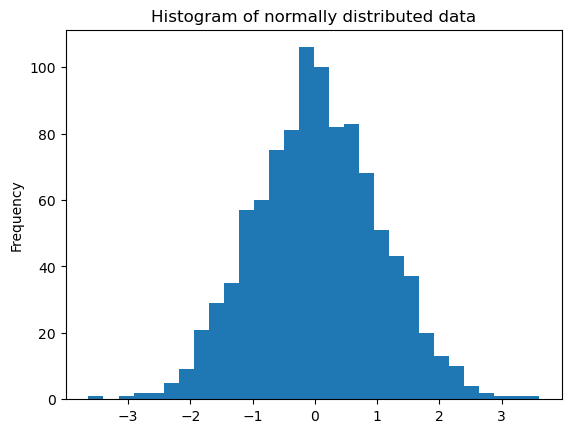

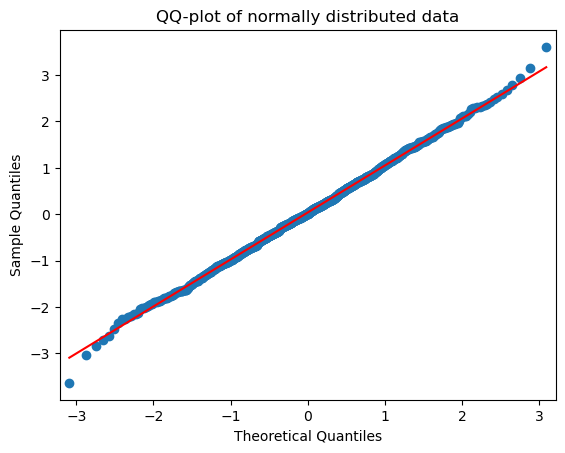

In [81]:

# Create a sample DataFrame with a normally distributed column
df1 = pd.DataFrame({'normal': np.random.normal(size=1000)})

# Plot a histogram of the data
df1['normal'].plot(kind='hist', bins=30)
plt.title('Histogram of normally distributed data')
plt.show()

# Create a QQ-plot of the data
sm.qqplot(df1['normal'], line='s')
plt.title('QQ-plot of normally distributed data')
plt.show()
#as the p vale is greater than 5 percent thus the data is normally distributed

In [84]:
#distributing data on country wise
df_India = df[df.Country == 'India'] # Subset df with country == India 
df_Malaysia = df[df.Country == 'Malaysia'] # Subset df with country == Malaysia 
df_UK = df[df.Country == 'United Kingdom'] # Subset df with country == UK
df_US = df[df.Country == 'United States'] # Subset df with country == US
df_Philippines = df[df.Country == 'Philippines'] # Subset df with country ==  Philippines 

In [85]:
# ANOVA : Null Hypothesis :: Mean of Population 1 (Sample 1) = Mean of Population 2 (Sample 2) = ... = Mean of Population n (Sample n) | (p-value >= 5% by default)

In [123]:
# ANOVA Using Scipy
mean_test_anova_scipy = sps.f_oneway(df_India.Revenue, df_Malaysia.Revenue,df_UK.Revenue,df_US.Revenue,df_Philippines.Revenue) # ANOVA
print(mean_test_anova_scipy)


F_onewayResult(statistic=2.930245513815576, pvalue=0.02023964892685341)


In [124]:
mean_pairwise_compare_scipy = sps.tukey_hsd(df_India.Revenue, df_Malaysia.Revenue,df_UK.Revenue,df_US.Revenue,df_Philippines.Revenue) # Tukey HSD
print(mean_pairwise_compare_scipy)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   1355.057     0.100  -148.167  2858.282
 (0 - 2)    113.007     1.000 -1390.217  1616.232
 (0 - 3)    348.050     0.970 -1155.175  1851.275
 (0 - 4)   1337.857     0.108  -165.367  2841.082
 (1 - 0)  -1355.057     0.100 -2858.282   148.167
 (1 - 2)  -1242.050     0.159 -2745.275   261.175
 (1 - 3)  -1007.007     0.356 -2510.232   496.217
 (1 - 4)    -17.200     1.000 -1520.425  1486.025
 (2 - 0)   -113.007     1.000 -1616.232  1390.217
 (2 - 1)   1242.050     0.159  -261.175  2745.275
 (2 - 3)    235.043     0.993 -1268.182  1738.267
 (2 - 4)   1224.850     0.170  -278.375  2728.075
 (3 - 0)   -348.050     0.970 -1851.275  1155.175
 (3 - 1)   1007.007     0.356  -496.217  2510.232
 (3 - 2)   -235.043     0.993 -1738.267  1268.182
 (3 - 4)    989.807     0.374  -513.417  2493.032
 (4 - 0)  -1337.857     0.108 -2841.082   165.367
 (4 - 1)     17.200     1.000 -1

In [89]:
# Test of Median of Two or more Populations : Non Parametric Test :: Kruskal-Wallis Test
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Null Hypothesis : Median of Population 1 (Sample 1) = Median of Population 2 (Sample 2) = ... = Median of Population n (Sample n) | (p-value >= 5% by default)

median_test_kruskal = sps.kruskal(df_India.Revenue, df_Malaysia.Revenue,df_UK.Revenue,df_US.Revenue,df_Philippines.Revenue)
print(median_test_kruskal)
# Inference : Median of countries are different  (p-value < 5%) 

KruskalResult(statistic=11.399909045010766, pvalue=0.022418835928238703)


In [105]:
# Product category wise analysis 
df_cc = df[df.Product == 'Chocolate Chip'] # Subset df with Product == Chocochip
df_fc = df[df.Product == 'Fortune Cookie'] # Subset df with Product == Fortune Cookie 
df_or = df[df.Product == 'Oatmeal Raisin'] # Subset df with Product == Oatmeal Raisin 
df_sn = df[df.Product == 'Snickerdoodle'] # Subset df with Product == Snickerdoodle
df_su = df[df.Product == 'Sugar'] # Subset df with Product == Snickerdoodle
df_wc = df[df.Product == 'White Chocolate Macadamia Nut'] # Subset df with Product ==  White Chocolate Macadamia Nut 

In [108]:
# ANOVA Using Scipy
mean_test_anova_scipy_Productwise = sps.f_oneway(df_cc.Revenue, df_fc.Revenue,df_or.Revenue,df_sn.Revenue,df_su.Revenue,df_su.Revenue) # ANOVA
print(mean_test_anova_scipy_Productwise)


F_onewayResult(statistic=nan, pvalue=nan)


In [110]:
# Test of Median of Two or more Populations : Non Parametric Test :: Kruskal-Wallis Test
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Null Hypothesis : Median of Population 1 (Sample 1) = Median of Population 2 (Sample 2) = ... = Median of Population n (Sample n) | (p-value >= 5% by default)

median_test_kruskal = sps.kruskal(df_India.Revenue, df_Malaysia.Revenue,df_UK.Revenue,df_US.Revenue,df_Philippines.Revenue)
print(median_test_kruskal)
# Inference : Median of product revenue are Different (p-value < 5%) 

KruskalResult(statistic=11.399909045010766, pvalue=0.022418835928238703)


In [111]:
# Null Hyposesis : Correlation = 0 (p-value >= 5% by default)

# Correlation between Car "mpg" and "hp"
correlation_test_pearson = sps.pearsonr(df.Revenue, df.Profit)
correlation_test_spearman = sps.spearmanr(df.Revenue, df.Profit)
print(correlation_test_pearson)
# Inference : revenue and profit are positively related (p value <5%)

PearsonRResult(statistic=0.9951625962307101, pvalue=0.0)


In [112]:
print(correlation_test_spearman)

SpearmanrResult(correlation=0.9954861153567501, pvalue=0.0)


## Observations 

1.	Price of all the product category are same throughout the countries - Chocochip 5 perunit , Fortune Cookie - 1 per unit, Oatmeal raisin 5 per unit, Snickerdoodle 4 per unit sugar 3 per unit and White chocolate 6 per unit
2.	Total no. of units sold by company in jan'2019 and jan'2020 is 1,125,824
3.	Total profit generated by company during the given period is US Dollar 2,763,4144.
4.	The maximum no. of units sold by company was on 4th jan2020 in US(4493units) and the least were sold on 5th jan'2020 of Fortune cookie in Inida
5.	Revenue generated from India on an average is highest = USDollar 7331.25 and Revenue generated from Malaysia on an average is lowest = US Dollar5976.19
6.	The most revenue generating product of company is Chocolate chip that too in Inida followd by chcocolate chip in US and in Philliphness Fortune Cookie is generating the least revenue for company.
7.	While observing the data it can be imputed that chocolate chip is the most favourite cookie flavour and Fortune Cookie are the least preffered category throughout the countries
8.	India is also the most profit generating country for company as compared to other countries mentioned
9.	In terms of unit sold Chocolate chip(30%) is at top followed by sugar(15%) ,white chocolate(14.4) and at last it's Snickerdoodle with(13%) 
10. Malaysia is the least revenue generating country for company

## Managerial Implications 

1.	Company should focus more on launching similar taste product category as chocolate chip as they are most preferred by the customers

2.	Company can also think of expanding their distribution in Asian countries. 

3.	Although fortune cookies are generating less revenue but they are not least preferred by customer as there units sold are more than snickerdoodle

4.	India and Phillipines revenue and unit sale pattern seems to be similar are ANOVA test 

5.	Malaysia and US revenue pattern are highly related 

6.	Company should focus more on promotion in Malaysia and philipnes.

7.	Company should also work on taste of fortune and snickerdoodle category and should do survey to analyse customer behaviour and preference to current category
